In [1]:
from NeuralNetwork2 import ANN2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import joblib

In [2]:
train_data = pd.read_csv('mnist_train.csv',header=None)
test_data = pd.read_csv('mnist_test.csv',header=None)
train_data = train_data.sample(n=600,random_state=1)
test_data = test_data.sample(n=100,random_state=1)

In [3]:
X_train = train_data.iloc[:,1:].values / 255
y_train = train_data.iloc[:,0].values.reshape(X_train.shape[0],1)
X_test = test_data.iloc[:,1:].values / 255
y_test = test_data.iloc[:,0].values.reshape(X_test.shape[0],1)

In [4]:
lr = np.arange(10)
one_hot = []
for label in y_train.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_train = one_hot
one_hot = []
for label in y_test.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_test = one_hot

In [5]:
model = joblib.load('Trained1Network.model')

In [ ]:
# sample = 80
# sample = 25
# sample = 30 ## Best one

Target 0
Target [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


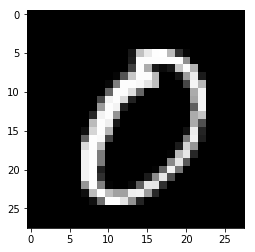

In [57]:
sample = 30
y_pred = model.predict(X_test[sample].reshape(1,784)).ravel()
print("Target {}".format(np.argmax(y_pred)))
print("Target {}".format(y_test[sample]))
plt.imshow(X_test[sample].reshape(28,28),cmap='gray')
plt.show()

In [58]:
X_target = X_test[sample].ravel()
y_goal = y_test[sample+1]

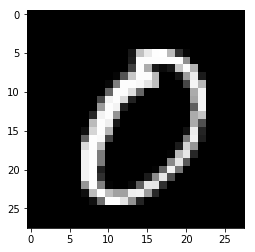

Predicted : 0
Adversial Goal : 3
Predicted : [8.57677979e-01 1.81109095e-04 2.44609704e-06 1.30335451e-04
 4.58702625e-05 3.48882566e-01 1.22257330e-06 1.65732754e-05
 9.88119518e-04 1.17630902e-06]
Adversial Goal : [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [59]:
plt.imshow(X_target.reshape(28,28),cmap='gray')
plt.show()
print('Predicted : {}'.format(np.argmax(y_pred)))
print('Adversial Goal : {}'.format(np.argmax(y_goal)))
print('Predicted : {}'.format(y_pred))
print('Adversial Goal : {}'.format(y_goal))

In [60]:
adversial_image = model.get_adversial_image(X_target=X_target,
                                            y_goal=y_goal,
                                            seed=2,
                                            learning_rate=0.01,
                                            _lambda=0.4,
                                            epochs=4000,
                                            print_results=True)

Epoch ---  0  MSE :  [103.33783062]
Epoch ---  100  MSE :  [47.54430911]
Epoch ---  200  MSE :  [22.57569867]
Epoch ---  300  MSE :  [11.40631109]
Epoch ---  400  MSE :  [6.4137009]
Epoch ---  500  MSE :  [4.18403433]
Epoch ---  600  MSE :  [3.18722385]
Epoch ---  700  MSE :  [2.74081986]
Epoch ---  800  MSE :  [2.54063297]
Epoch ---  900  MSE :  [2.45076985]
Epoch ---  1000  MSE :  [2.41039744]
Epoch ---  1100  MSE :  [2.39224593]
Epoch ---  1200  MSE :  [2.38407901]
Epoch ---  1300  MSE :  [2.38040178]
Epoch ---  1400  MSE :  [2.37874491]
Epoch ---  1500  MSE :  [2.37799794]
Epoch ---  1600  MSE :  [2.37766107]
Epoch ---  1700  MSE :  [2.37750919]
Epoch ---  1800  MSE :  [2.3774408]
Epoch ---  1900  MSE :  [2.37741009]
Epoch ---  2000  MSE :  [2.37739637]
Epoch ---  2100  MSE :  [2.37739029]
Epoch ---  2200  MSE :  [2.37738762]
Epoch ---  2300  MSE :  [2.37738645]
Epoch ---  2400  MSE :  [2.37738594]
Epoch ---  2500  MSE :  [2.3773857]
Epoch ---  2600  MSE :  [2.37738557]
Epoch ---  

In [61]:
print('Last Epoch Error : ', model.adversial_loss[-1])

Last Epoch Error :  [2.37738458]


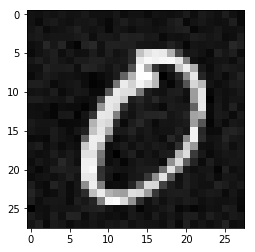

In [62]:
plt.imshow(adversial_image.reshape(28,28),cmap='gray')
plt.show()

Adversial Prediction 3
Actual Prediction [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


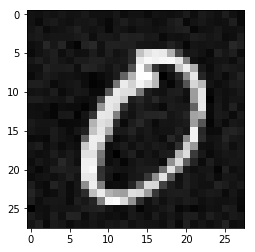

In [63]:
y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()
print("Adversial Prediction {}".format(np.argmax(y_pred_adversial)))
print("Actual Prediction {}".format(y_test[sample]))
plt.imshow(adversial_image.reshape(28,28),cmap='gray')
plt.show()

In [65]:
np.around(y_pred_adversial,decimals=2)

array([0.11, 0.  , 0.  , 0.84, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  ])

In [66]:
np.around(y_pred, decimals=2)

array([0.86, 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.  , 0.  ])

In [70]:
np.max(adversial_image)

1.0635813700466146